In [1]:
import pandas as pd
import glob
import os
import csv
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from itertools import cycle, islice
from scipy import stats

In [2]:
path = "Experimental Results/"
files = os.listdir(path)
experiments = files[1:]

In [3]:
experiments

['Temp10MoveCloser',
 'Temp10MoveCloserRand5',
 'Temp15MoveCloser',
 'Temp15MoveCloserRand5',
 'Temp50MoveCloser',
 'Temp50MoveCloserRand5',
 'Temp5MoveCloser',
 'Temp5MoveCloserRand5']

## Choose experiment with index "i"

In [4]:
#Run for each experiment
i = 7
experiments[i]

'Temp5MoveCloserRand5'

In [5]:
#Read <method>_<set>
hyp_test = glob.glob(path + experiments[i] + "/Hyp_Test*")
rand_test = glob.glob(path + experiments[i] + "/rand_Test*")
hyp_train = glob.glob(path + experiments[i] + "/Hyp_Train*")
rand_train = glob.glob(path + experiments[i] + "/rand_Train*")

In [6]:
#Function to extract epochs from folder name
def extractEpochs(file):
    i = file.find("_")
    temp = file[i+1:]
    i = temp.find("_")
    temp = temp[i+1:]
    epochs = temp[:temp.find("_")]
    return epochs

In [7]:
#Computes data frame with avg_waste per instance for epochs 1,5,10,25,50
def computeTable(method_set):
    all_epochs = pd.DataFrame()
    for b in range(5):
        allSamples = []
        for i in range(10):
            values = []
            with open(method_set[i+b*10], 'r') as f:
              reader = csv.reader(f)
              your_list = list(reader)
            values = [a[1] for a in your_list]
            values = values[1:]
            allSamples.append(values)
        allSamples = np.array(allSamples).astype(float)
        avg_perinstance = np.average(allSamples,axis=0)
        all_epochs[extractEpochs(method_set[b*10])] = avg_perinstance
        #avg_epoch = np.average(avg_instance)
    all_epochs = all_epochs.reindex(sorted(all_epochs.columns), axis=1)
    return all_epochs

#header = your_list[0]
#rowNames = [your_list[i+1][0] for i in range(len(your_list)-1)]

In [8]:
#Shows boxplot
def boxplotTable(all_epochs,fig_title):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    plt.ylabel('Average Waste')
    plt.xlabel('# Epochs')
    plt.title(fig_title)
    #data = [all_epochs['1'],all_epochs['10'],all_epochs['25'],all_epochs['50'],all_epochs['100']]
    col_names = list(all_epochs.columns)
    data = [all_epochs[col] for col in col_names]
    # Create the boxplot
    bp = ax.boxplot(data,showfliers=False,labels=list(all_epochs.columns),showmeans = True)
    # Save the figure
    fig.savefig(fig_title + ".png", bbox_inches='tight')


## Test Average Waste for all epochs

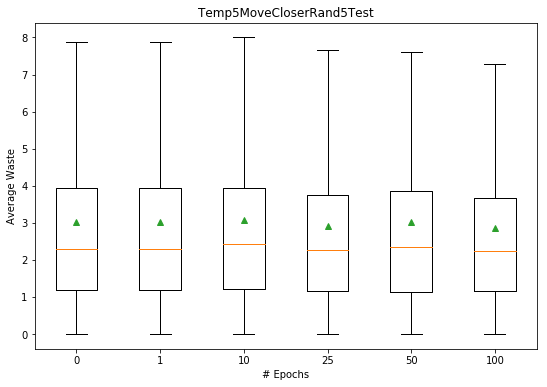

In [9]:
hyp_test_table = computeTable(hyp_test)
rand_test_table = computeTable(rand_test)
hyp_test_table['0'] = rand_test_table['1'] #0 epochs means random (no training)
hyp_test_table = hyp_test_table.reindex(['0', '1', '10', '25', '50', '100'], axis=1)
name = experiments[i] + "Test"
#experiments index determines temperature and strategy
boxplotTable(hyp_test_table,name) 

#Save means to dataFrame and Latex table
means = pd.DataFrame(hyp_test_table.mean(axis=0))
means.index.name = 'epochs'
means.reset_index(inplace=True)
means.columns = ["epochs","Avg_waste"]
with open(name +".tex",'w') as tf:
    tf.write(means.to_latex(index=False))

## Train Average Waste for all epochs

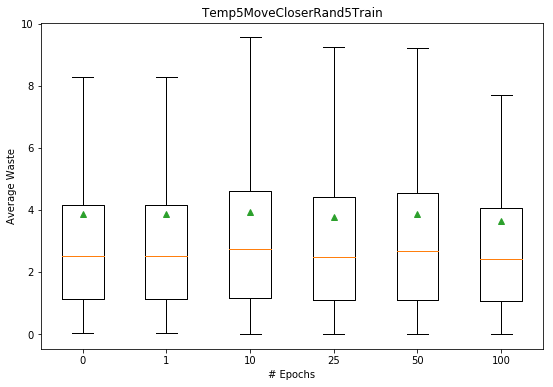

In [10]:
hyp_train_table = computeTable(hyp_train)
rand_train_table = computeTable(rand_train)
hyp_train_table['0'] = rand_train_table['1'] #0 epochs means random (no training)
hyp_train_table = hyp_train_table.reindex(['0', '1', '10', '25', '50', '100'], axis=1)
name = experiments[i] + "Train"
#experiments index determines temperature and strategy
boxplotTable(hyp_train_table,name) 

#Save means to dataFrame and Latex table
means = pd.DataFrame(hyp_train_table.mean(axis=0))
means.index.name = 'epochs'
means.reset_index(inplace=True)
means.columns = ["epochs","Avg_waste"]
with open(name +".tex",'w') as tf:
    tf.write(means.to_latex(index=False))

## Compute average waste of using only one heuristic for the whole instance in Test set

Experimental Results/Temp10MoveCloser\heuristics_Test.csv


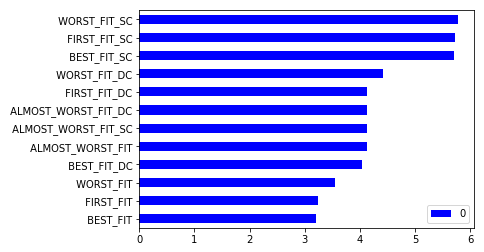

In [11]:
only_heuristics_path = glob.glob(path + experiments[0] + "/heur*")
print(only_heuristics_path[0])
only_heuristics = pd.read_csv(only_heuristics_path[0])
only_heuristics = only_heuristics.iloc[:,1:]
only_heur_means = pd.DataFrame(only_heuristics.mean(axis=0))
only_heur_means = only_heur_means.sort_values(by =0, ascending = 1)

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(only_heur_means)))
only_heur_means.plot(kind='barh',color=my_colors)


In [12]:
only_heur_means

,0
BEST_FIT,3.196355
FIRST_FIT,3.234237
WORST_FIT,3.546475
BEST_FIT_DC,4.036136
ALMOST_WORST_FIT,4.120164
ALMOST_WORST_FIT_SC,4.120164
ALMOST_WORST_FIT_DC,4.120164
FIRST_FIT_DC,4.128418
WORST_FIT_DC,4.416305
BEST_FIT_SC,5.700672


# Compute oracle

In [13]:
only_heuristics

,FIRST_FIT,FIRST_FIT_SC,FIRST_FIT_DC,BEST_FIT,BEST_FIT_SC,BEST_FIT_DC,WORST_FIT,WORST_FIT_SC,WORST_FIT_DC,ALMOST_WORST_FIT,ALMOST_WORST_FIT_SC,ALMOST_WORST_FIT_DC
0,1.6154,3.9333,2.8571,1.6154,3.9333,2.8571,2.8571,3.9333,2.8571,2.8571,2.8571,2.8571
1,3.0000,3.0000,4.6000,3.0000,3.0000,4.6000,3.0000,3.0000,4.6000,4.6000,4.6000,4.6000
2,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000
3,1.0000,2.2500,1.3448,1.0000,2.2500,1.3448,1.3448,2.5152,1.3448,1.3448,1.3448,1.3448
4,0.0270,0.1750,0.0270,0.0270,0.1750,0.0270,0.0270,0.1750,0.0270,0.0270,0.0270,0.0270
5,0.1786,0.5312,0.1786,0.1786,0.5312,0.1786,0.1786,0.5312,0.1786,0.1786,0.1786,0.1786
6,1.3333,3.6000,1.3333,1.3333,3.6000,1.3333,1.3333,3.6000,1.3333,1.3333,1.3333,1.3333
7,2.7500,5.2222,2.7500,2.7500,5.2222,2.7500,2.7500,5.2222,3.6400,2.7500,2.7500,2.7500
8,4.6000,5.9375,11.4091,4.6000,5.9375,11.4091,4.6000,5.9375,11.4091,11.4091,11.4091,11.4091
9,6.7500,9.2000,9.2000,6.7500,9.2000,9.2000,6.7500,9.2000,9.2000,9.2000,9.2000,9.2000


In [14]:
#Oracle is the product of choosing the best heuristic for each instance in test set and averaging average wastes
best_waste = only_heuristics.min(axis=1)
best_waste_avg = best_waste.mean(axis=0)
best_waste_avg

3.139181000000001

## Find min & max average waste for each Temperature, Strategy and Epoch in Test set

In [15]:
 def findBestEpoch(hyp_set,rand_set,exp_num,set_name):
    hyp_set_table = computeTable(hyp_set)
    rand_set_table = computeTable(rand_set)
    hyp_set_table['0'] = rand_set_table['1'] #0 epochs means random (no training)
    hyp_set_table = hyp_set_table.reindex(['0', '1', '10', '25', '50', '100'], axis=1)
    #name = experiments[exp_num] + set_name
    return hyp_set_table

In [16]:
experiment_tables = {}
for i in range(len(experiments)):
    hyp_test = glob.glob(path + experiments[i] + "/Hyp_Test*")
    rand_test = glob.glob(path + experiments[i] + "/rand_Test*")
    experiment_tables[experiments[i]] = findBestEpoch(hyp_test,rand_test,i,"Test")

In [17]:
#Find the worst epoch num for each experiment and save it into a dictionary
worst_epochs_exps = {}
for key, value in experiment_tables.items():
    exp_means = pd.DataFrame(value.mean(axis=0))
    worst_epoch = exp_means.idxmax(axis=0)[0]
    worst_epochs_exps[key] = (worst_epoch,exp_means.at[worst_epoch,0])
    #print(key)
    #print("worst epoch: " + worst_epoch)
    #print("Average Waste " + str(exp_means.at[worst_epoch,0]))

In [18]:
random_avg_waste = worst_epochs_exps['Temp10MoveCloser'][1]
random_avg_waste

3.0312030999999995

In [19]:
#Find the best epoch for each experiment and save it into a dictionary
best_epochs_exps = {}
for key, value in experiment_tables.items():
    exp_means = pd.DataFrame(value.mean(axis=0))
    best_epoch = exp_means.idxmin(axis=0)[0]
    best_epochs_exps[key] = (best_epoch,exp_means.at[best_epoch,0])
    #print(key)
    #print("best epoch: " + best_epoch)
    #print("Average Waste " + str(exp_means.at[best_epoch,0]))

In [20]:
best_values = [value[1] for value in list(best_epochs_exps.values())]
best_epochs = [value[0] for value in list(best_epochs_exps.values())]
temp_strat = list(best_epochs_exps.keys())

best_values.append(random_avg_waste)
best_epochs.append('0')
temp_strat.append("Random")

best_dataframe = pd.DataFrame()
best_dataframe['Temperature_Strategy'] = temp_strat
best_dataframe['# Epochs'] = best_epochs
best_dataframe['Avg. Waste'] = best_values
#Create table for best + worst

best_dataframe = best_dataframe.sort_values(by ='Avg. Waste', ascending = 1)
best_dataframe

with open("BestParameters.tex",'w') as tf:
    tf.write(best_dataframe.to_latex())

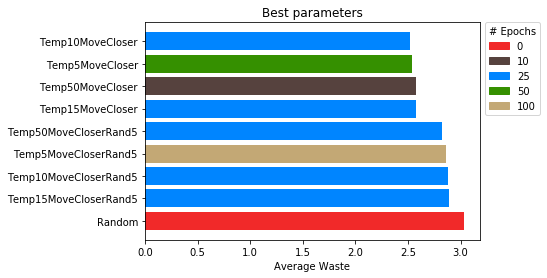

In [21]:
#plot best parameters
fig, ax = plt.subplots()

colors = {'0':'#F12929','10':'#56423E', '25':'#0085FF', '50':'#359000', '100':'#C3A875'}
ax.barh(best_dataframe["Temperature_Strategy"], 
        best_dataframe['Avg. Waste'],
        color=best_dataframe['# Epochs'].apply(lambda x: colors[x])
       )
#ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Waste')
ax.set_title('Best parameters')

patch = []
for key,value in colors.items():
    patch.append(mpatches.Patch(color=value, label=key))

plt.legend(handles=patch,title="# Epochs",bbox_to_anchor=(1, 1.025), loc=2)
fig.savefig("BestParameters.png", bbox_inches='tight')
plt.show()

In [22]:
#Create dataframe for worst values
worst_values = [value[1] for value in list(worst_epochs_exps.values())]
worst_epochs = [value[0] for value in list(worst_epochs_exps.values())]
worst_temp_strat = list(worst_epochs_exps.keys())

worst_dataframe = pd.DataFrame()
worst_dataframe['Temperature_Strategy'] = worst_temp_strat
worst_dataframe['# Epochs'] = worst_epochs
worst_dataframe['Avg. Waste'] = worst_values
#Create table for best + worst

worst_dataframe = worst_dataframe.sort_values(by ='Avg. Waste', ascending = 1)
worst_dataframe

,Temperature_Strategy,# Epochs,Avg. Waste
0,Temp10MoveCloser,0,3.031203
2,Temp15MoveCloser,0,3.031203
3,Temp15MoveCloserRand5,0,3.031203
6,Temp5MoveCloser,0,3.031203
5,Temp50MoveCloserRand5,10,3.039360
7,Temp5MoveCloserRand5,10,3.084245
1,Temp10MoveCloserRand5,10,3.091256
4,Temp50MoveCloser,100,3.127410


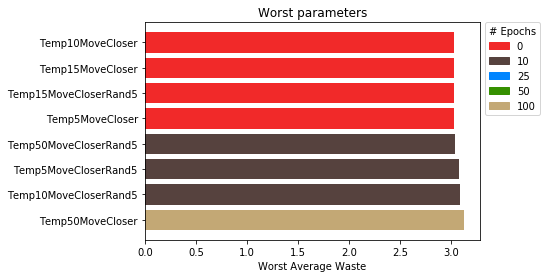

In [23]:
#Plot worst parameters
fig, ax = plt.subplots()

colors = {'0':'#F12929','10':'#56423E', '25':'#0085FF', '50':'#359000', '100':'#C3A875'}
ax.barh(worst_dataframe["Temperature_Strategy"], 
        worst_dataframe['Avg. Waste'],
        color=worst_dataframe['# Epochs'].apply(lambda x: colors[x])
       )
#ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Worst Average Waste')
ax.set_title('Worst parameters')

patch = []
for key,value in colors.items():
    patch.append(mpatches.Patch(color=value, label=key))

plt.legend(handles=patch,title="# Epochs",bbox_to_anchor=(1, 1.025), loc=2)

plt.show()

## Comparing best hyperheuristic with using only one heuristic for the whole instance

Best hyperheuristic:Temp10MoveCloser


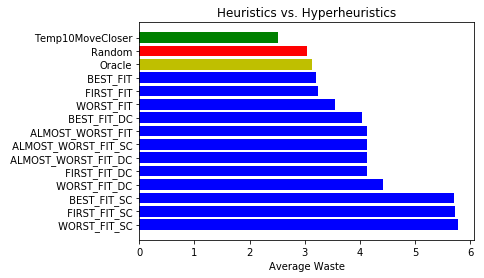

In [24]:
#plot best parameters
fig, ax = plt.subplots()

comparison_df = only_heur_means
comparison_df.loc[best_dataframe.loc[0][0]] = best_dataframe.loc[0][2]
comparison_df.loc["Oracle"] = best_waste_avg
comparison_df.loc["Random"] = random_avg_waste
comparison_df = comparison_df.sort_values(by =0, ascending = 1)

method_names = comparison_df.index
method_values = comparison_df[0]

print("Best hyperheuristic:" + str(best_dataframe.loc[0][0]))


ax.barh(method_names[0], 
        method_values[0],
        color = "g"
       )
ax.barh(method_names[1], 
        method_values[1],
        color = "r"
       )
ax.barh(method_names[2], 
        method_values[2],
        color = "y"
       )
ax.barh(method_names[3:], 
        method_values[3:],
        color = "b"
       )
#ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Waste')
ax.set_title('Heuristics vs. Hyperheuristics')
fig.savefig("HeuristicsVsHyperheuristics.png", bbox_inches='tight')
plt.show()

In [25]:
comparison_df
with open("HeuristicsVsHyperheuristics.tex",'w') as tf:
    tf.write(comparison_df.to_latex())

## Statistical testing

We want to be sure if differences among instances' average waste in the test set under different solving procedures is significant. A t-student test was carried out since we don't know the population mean of problems' average waste.

In [26]:
#only_heuristics
Temp10MoveCloserTest = experiment_tables['Temp10MoveCloser']['25']
oracle = best_waste
randomHyp = experiment_tables['Temp10MoveCloser']['0']

In [27]:
stats.ttest_ind(oracle,Temp10MoveCloserTest, equal_var = True)

Ttest_indResult(statistic=1.666181927513311, pvalue=0.09630599974557875)

In [28]:
header_list = ['p-value']
p_values = pd.DataFrame(columns = header_list)
for column in only_heuristics:
    p_values.loc[column] = stats.ttest_ind(only_heuristics[column],Temp10MoveCloserTest).pvalue
p_values.loc['Random'] = stats.ttest_ind(randomHyp,Temp10MoveCloserTest).pvalue
p_values.loc['Oracle'] = stats.ttest_ind(oracle,Temp10MoveCloserTest).pvalue
p_values = p_values.sort_values(by ='p-value', ascending = 0)


In [29]:
p_values
with open("pvalues.tex",'w') as tf:
    tf.write(p_values.to_latex())

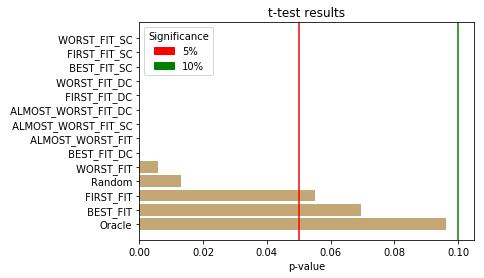

In [30]:
fig, ax = plt.subplots()
ax.axvline(0.05,color='r')
ax.axvline(0.1,color='g')
ax.set_xlabel("p-value")
ax.set_title('t-test results')

red_patch = mpatches.Patch(color = 'r', label='5%')
green_patch = mpatches.Patch(color = 'g', label='10%')
plt.legend(handles=[red_patch,green_patch],title="Significance")
ax.barh(list(p_values.index),p_values['p-value'],color="#C3A875")
fig.savefig("pvalues.png", bbox_inches='tight')